1.a)

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('accounts.csv')

In [22]:
features = data.iloc[:, :8]  # escolhe as 8 primeiras colunas
features.drop_duplicates(inplace=True) 
features.dropna(inplace=True)  # Retira linhas com valores em falta

In [23]:
features = pd.get_dummies(features, drop_first=True)

In [24]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(features)

In [25]:
sse = []  
k_values = range(2, 9)

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

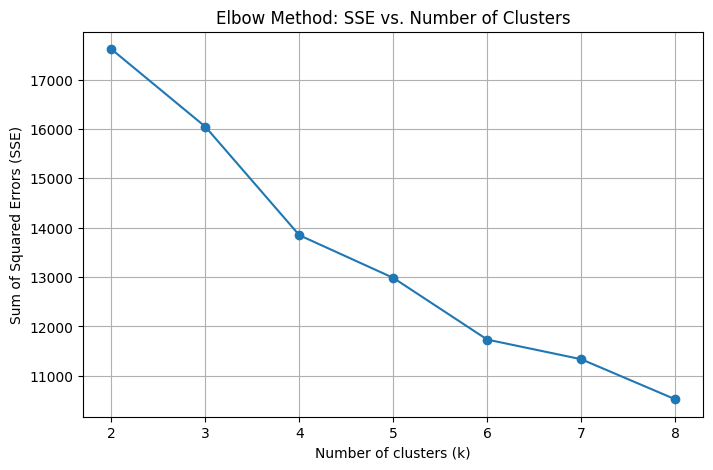

In [26]:
plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method: SSE vs. Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

2.a)

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('accounts.csv')

features = data.iloc[:, :8]  
features.drop_duplicates(inplace=True)  
features.dropna(inplace=True) 
features = pd.get_dummies(features, drop_first=True) 

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
pca = PCA(n_components=2)  # top 2 components
pca.fit(scaled_data)

PCA(n_components=2)

In [32]:
explained_variance = pca.explained_variance_ratio_
explained_variance_percentage = np.sum(explained_variance) * 100
print(f'The top 2 principal components explain {explained_variance_percentage:.2f}% of the variability in the data.')

The top 2 principal components explain 22.76% of the variability in the data.


2. b)


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

data = pd.read_csv('accounts.csv')

features = data.iloc[:, :8]
features.drop_duplicates(inplace=True)
features.dropna(inplace=True)
features = pd.get_dummies(features, drop_first=True)

In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

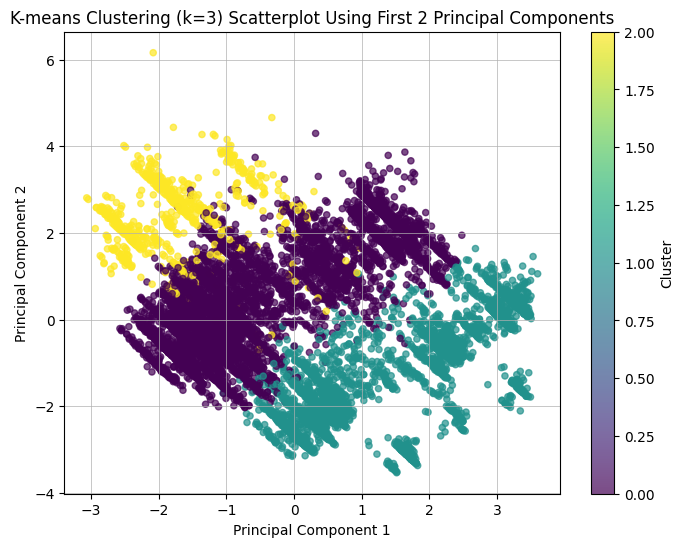

In [35]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', s=20, alpha=0.7)
plt.title("K-means Clustering (k=3) Scatterplot Using First 2 Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='-', linewidth=0.5)
plt.show()